For simplicity, we will use only a few continuous variables, for example:

LotArea (the area of the lot in square feet),

OverallQual (an overall quality rating),

YearBuilt (the construction year).

Data Preprocessing
The first step is to:

-Load the dataset (you can download the .csv file from Kaggle),

-Select only the numerical columns we are interested in,

-Normalize them to have mean 0 and variance 1,

-Add a bias column of ones to X


In [31]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("data/train.csv")

# seleziono le feature che mi interessano
features = ["LotArea", "OverallQual", "YearBuilt"]

X = train_data[features].values
Y = train_data["SalePrice"].values.reshape(-1,1)
# Y è un vettore colonna, -1 dice a numpy di usare la dimensione che gli pare 
# ossia il numero di elementi che ci sono in Y, che è l'unico valore che non da errore

# normalizzo le feature, ovvero prendo il dataset, sottraggo la media
# e divido per standard deviation
# il dataset ora dovrebbe assomgliare a una gaussiana
X = (X - X.mean(axis=0)) / X.std(axis=0) 
Y = (Y - Y.mean(axis=0)) / Y.std(axis=0)

# aggiungo bias term
X = np.hstack([np.ones((X.shape[0],1)), X])
N, d = X.shape
print(f"Dataset size: {N} samples, {d} features (including bias term)")


Dataset size: 1460 samples, 4 features (including bias term)


We now implement Gradient Descent 

In [39]:
def l(Theta, X, Y):
    return np.mean(np.square(X @ Theta - Y))
def grad_l(Theta, X, Y):
    return 2* X.T @(X @ Theta - Y) / X.shape[0]
def SGD(l,grad_l, X, Y,Theta0, lr=1e-2, batch_size=32, epochs =10):
    #l: loss function, grad_l: ...
    #lr: eta

    # save the value of the loss over the iterations
    loss_val = []

    Theta = Theta0
    for epoch in range(epochs):

        #step 4 = restart data and shuffle
        shuffle_idx = np.arange(len(X))
        np.random.shuffle(shuffle_idx)

        X = X[shuffle_idx]
        Y = Y[shuffle_idx]

        n_batches= len(X)//batch_size

        for batch in range (n_batches):
            #step 1 = randomly sample a batch
            Xb = X[batch * batch_size : (batch+1)*batch_size]
            Yb = Y[batch * batch_size : (batch+1)*batch_size]
            #step 2 = compute the grad_l over Xb, Yb
            g = grad_l(Theta, Xb, Yb)
            #step 3 = perform one step of gradient descent on g
            Theta = Theta - lr *g 

            #update loss_val list
            loss_val.append(l(Theta, X, Y))
        
    return Theta, epochs, loss_val #total number of iterations 

Theta0 = np.zeros((d,1)) #4 features including bias term
Theta, epochs, loss_val = SGD (l, grad_l, X, Y, Theta0, lr =1e-3, batch_size=32, epochs=100)

print(f"Trained model parameters after {epochs} epochs:")
print(Theta)

Trained model parameters after 100 epochs:
[[5.22139325e-04]
 [1.88423701e-01]
 [6.98520517e-01]
 [1.22796892e-01]]


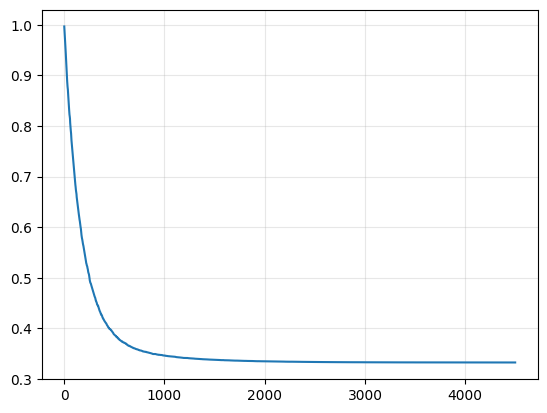

In [40]:
import matplotlib.pyplot as plt

plt.plot(loss_val)
plt.grid(alpha = 0.3)
plt.show()